In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset


 38% 5.00M/13.1M [00:00<00:01, 5.74MB/s]
100% 13.1M/13.1M [00:01<00:00, 13.5MB/s]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_zip(source,dest):
  import zipfile
  data = zipfile.ZipFile(source,'r')
  data.extractall(dest)
  data.close()

extract_zip('/content/english-handwritten-characters-dataset.zip','/content/')

In [ ]:
import os

In [ ]:
len(os.listdir('/content/Img'))

3410

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x = plt.imread('/content/Img/img001-001.png')

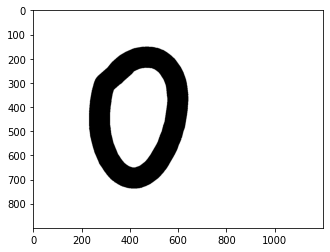

In [ ]:
plt.imshow(x)

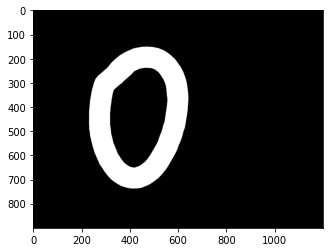

In [ ]:
plt.imshow(1-x)

In [ ]:
import numpy as np


In [ ]:
np.amax(x)

1.0

In [ ]:
images = os.listdir('/content/Img')

In [ ]:
mxValues = []
ims = []
sh = (900, 1200, 3)
for i in images:
  x = plt.imread('/content/Img/' + i)
  
  ims.append(x)
  mxValues.append(np.amax(x))

In [ ]:
mxValues

In [ ]:
np.amax(np.array(mxValues))

1.0

In [ ]:
x.shape

(900, 1200, 3)

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

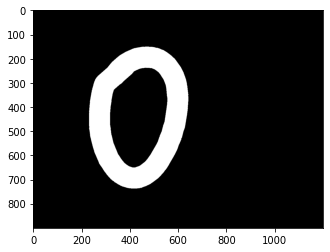

In [ ]:
plt.imshow(rgb2gray(1-x),cmap='gray')

In [ ]:
gray = rgb2gray(1-x)

In [ ]:
import cv2

In [ ]:
coords = cv2.findNonZero(gray) # Find all non-zero points (text)
x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box

In [ ]:
x,y,w,h

(232, 151, 411, 586)

In [ ]:
rect = gray[y:y+h, x:x+w]

In [ ]:
rect.shape

(586, 411)

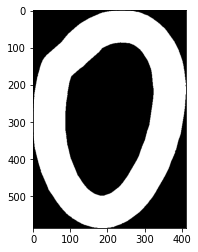

In [ ]:
plt.imshow(rect,cmap='gray')

In [ ]:
def crop(gray):
  coords = cv2.findNonZero(gray) # Find all non-zero points (text)
  x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
  rect = gray[y:y+h, x:x+w]
  return rect

def readImageAsGrayAndFlip(filePath):
  img = plt.imread(filePath)
  img = rgb2gray( 1 - img) 
  return img

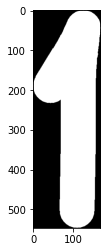

In [ ]:
im2 = readImageAsGrayAndFlip('/content/Img/img002-002.png')
im2 = crop(im2)
plt.imshow(im2,cmap='gray')

In [ ]:
import random

In [ ]:
SIZE = 800

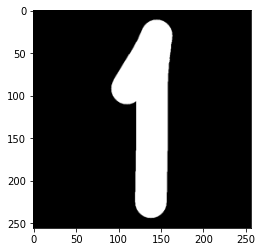

In [ ]:
im3 = np.zeros(shape=(SIZE,SIZE))
w = im2.shape[0]
h = im2.shape[1]
if (w > SIZE):
  print("Increase size")
top = (SIZE - h ) // 2
left = (SIZE - w) // 2
im3[left : left + w , top : top+h ] = im2
im3 = cv2.resize(im3, (256,256), interpolation = cv2.INTER_AREA)
plt.imshow(im3,cmap='gray')


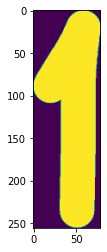

In [ ]:
r = im2.shape[0] / im2.shape[1]
im4 = cv2.resize(im2,(int(256 / r),256),interpolation = cv2.INTER_AREA)
plt.imshow(im4)

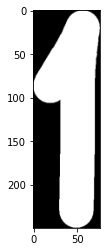

In [ ]:
im5 = reshapeAlongMax(im2,250)
plt.imshow(im5,cmap='gray')

In [ ]:
def center(img, shape):
  z = np.zeros(shape=(shape,shape))
  w, h = img.shape
  left = (shape - w) // 2
  top = (shape - h) // 2
  z[left: left + w, top : top + h] = img
  return z


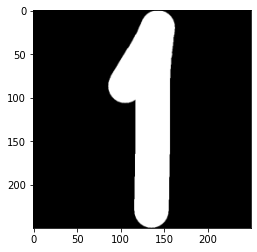

In [ ]:
plt.imshow(center(im5,250),cmap='gray')

In [ ]:
def reshapeAlongMax(img,shape):
  w, h = img.shape
  r = w / h
  if w > h:
    im4 = cv2.resize(img,(int(shape / r),shape),interpolation = cv2.INTER_AREA)
  else:
    im4 = cv2.resize(img,(shape,int(r * shape)),interpolation = cv2.INTER_AREA)
  return im4
  

In [2]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def crop(gray):
  coords = cv2.findNonZero(gray) # Find all non-zero points (text)
  x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
  rect = gray[y:y+h, x:x+w]
  return rect

def readImageAsGrayAndFlip(filePath):
  img = plt.imread(filePath)
  img = rgb2gray( 1 - img) 
  return img

def center(img, shape):
  z = np.zeros(shape=(shape,shape))
  w, h = img.shape
  left = (shape - w) // 2
  top = (shape - h) // 2
  z[left: left + w, top : top + h] = img
  return z

def reshapeAlongMax(img,shape):
  w, h = img.shape
  r = w / h
  if w > h:
    im4 = cv2.resize(img,(int(shape / r),shape),interpolation = cv2.INTER_AREA)
  else:
    im4 = cv2.resize(img,(shape,int(r * shape)),interpolation = cv2.INTER_AREA)
  return im4

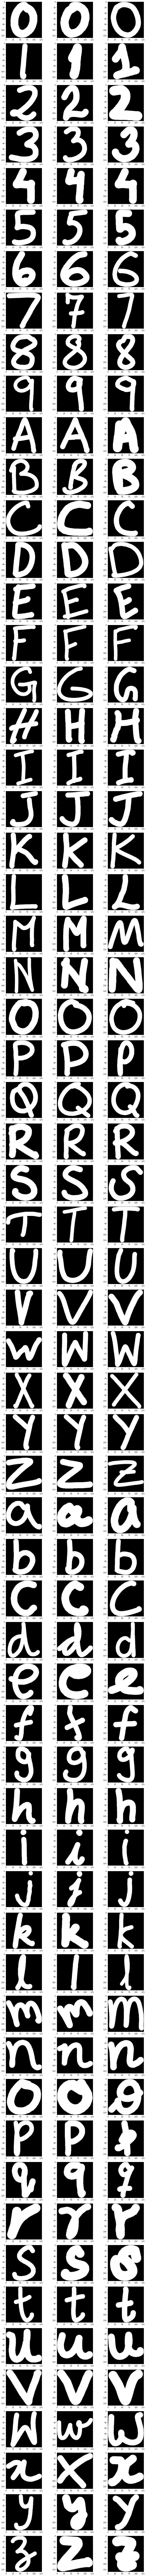

In [ ]:

fig,axes = plt.subplots(nrows=62,ncols=3,figsize=(12,200));
fig.tight_layout()
# print(axes)
colC = 1 
for ax in axes:
  classIndex = '';
  if colC < 10:
    classIndex = '00' + str(colC)
  else:
    classIndex = '0' + str(colC)
  colC += 1
  for col in ax:
    index = random.randint(1,55)
    if (index < 10):
      index = '00' + str(index)
    else:
      index = '0' + str(index)
    img = readImageAsGrayAndFlip('/content/Img/img' + classIndex + '-' + index + '.png')
    img = crop(img)

    # im3 = np.zeros(shape=(SIZE,SIZE))
    # w = img.shape[0]
    # h = img.shape[1]
    # if (w > SIZE):
    #   print("Increase size")
    # top = (SIZE - h ) // 2
    # left = (SIZE - w) // 2
    # im3[left : left + w , top : top+h ] = img
    # im3 = cv2.resize(im3, (256,256), interpolation = cv2.INTER_AREA)

    # r = img.shape[0] / img.shape[1]
    # im4 = cv2.resize(img,(int(256 / r),256),interpolation = cv2.INTER_AREA)
    # plt.imshow(im4)
    im5 = reshapeAlongMax(img,128)
    im5 = center(im5,128)

    # img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
    col.imshow(im5,cmap='gray')

In [ ]:
i = 1
number_of_images = len(images)
# while (i <= number_of_images):
  

In [ ]:
images[0]
"asdasd"[0:2]

'as'

In [ ]:
extractClass(images[0])

23

In [ ]:
img_list = []
label_list = []
c = 0
for i in files:
  img = readImageAsGrayAndFlip('/content/Img/' + i)
  img = crop(img)
  img = reshapeAlongMax(img,128)
  img = center(img,128)
  img_list.append(img)
  label_list.append(extractClass(i))
  # plt.imshow(img,cmap='gray')
  # plt.show()
  # c += 1
  # if c > 10:
  #   break

In [ ]:
img_list

In [ ]:
arr = np.hstack(img_list)

In [ ]:
img_list2 = [np.expand_dims(i,0) for i in img_list ]

In [ ]:
arr_images = np.vstack(img_list2)
arr_label = np.vstack(label_list)

[60]


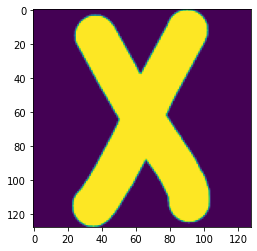

In [ ]:
plt.imshow(np.squeeze(arr_images[0]))
print(arr_label[0])

In [ ]:
arr.shape

(3410, 128, 128)

In [ ]:
np.save('/content/drive/MyDrive/arr_images.npy',arr_images)
np.save('/content/drive/MyDrive/arr_labels.npy',arr_label)


In [1]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.layers import Input,Conv2D,Dense,Lambda,Flatten,Dropout,Add,Concatenate,MaxPooling2D,BatchNormalization,Activation,concatenate, AveragePooling2D,GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split


In [2]:
def extractClass(imgFileName):
  cls = imgFileName[3:6]
  return int(cls)

In [3]:
X = np.load('/content/drive/MyDrive/arr_images.npy')
Y = np.load('/content/drive/MyDrive/arr_labels.npy') - 1
X = np.expand_dims(X, -1)

In [4]:
ratio = .85
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 1 - ratio, random_state=42)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
np.amax(y_test)

(2898, 128, 128, 1)
(2898, 1)
(512, 128, 128, 1)
(512, 1)


61

In [ ]:
files = os.listdir('/content/Img')

In [6]:
input = Input((128,128,1))
x = Conv2D(16,7,activation='relu')(input)
x = MaxPooling2D()(x)
x = Conv2D(16,7,activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32,7,activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64,5,activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(62,3,activation='relu')(x)
x = Flatten()(x)
x = Dense(62,activation='softmax')(x)
model = Model(inputs = [input],outputs = [x])


In [8]:
drop_out_rate = .5
def IdentityBlock1(x,filters):
  br1 = Conv2D(filters,3,padding='same')(x)
  # br1 = BatchNormalization(3)(br1)
  br1 = Activation('relu')(br1)
  br2 = Conv2D(filters,5,padding='same')(x)
  # br2 = BatchNormalization(3)(br2)
  br2 = Activation('relu')(br2)
  br3 = Conv2D(filters,7,padding='same')(x)
  # br3 = BatchNormalization(3)(br3)
  br3 = Activation('relu')(br3)
  br4 = Conv2D(filters,1)(x)
  # br4 = BatchNormalization(3)(br4)
  br4 = Activation('relu')(br4)
  br5 = MaxPooling2D((3,3),strides=(1,1),padding='same')(x)
  br6 = AveragePooling2D((3,3),strides=(1,1),padding='same')(x)
  x = Concatenate()([br1,br2,br3,br4,br5,br6])
  x = Conv2D(filters, (1,1), activation='relu')(x)
  return x

def residualBlock(x):
  shape = x.shape
  print(shape)
  br1 = Conv2D(x.shape[3],3,padding='same')(x)
  br1 = Activation('relu')(br1)
  br1 = Conv2D(x.shape[3],3,padding='same')(br1)
  br1 = Activation('relu')(br1)
  br1 = Conv2D(x.shape[3],3,padding='same')(br1)
  br1 = Activation('relu')(br1)
  br2 = MaxPooling2D(strides = (1,1),padding='same')(x)
  br3 = AveragePooling2D(strides = (1,1),padding='same')(x)
  x = Add()([x,br1,br2,br3])
  x = Activation('relu')(x)
  x = Conv2D(shape[3],1,activation='relu')(x)
  return x

input = Input(shape=(128,128,1))
x = Conv2D(32,3)(input)
# x = BatchNormalization(3)(x)
x = Activation('relu')(x)
x = IdentityBlock1(x,32)
x = Dropout(drop_out_rate)(x)
x = residualBlock(x)
x = IdentityBlock1(x,32)
x = Dropout(drop_out_rate)(x)
x = residualBlock(x)
x = MaxPooling2D()(x)
x = IdentityBlock1(x,32)
x = Dropout(drop_out_rate)(x)
x = IdentityBlock1(x,32)
x = Dropout(drop_out_rate)(x)
x = MaxPooling2D()(x)
x = IdentityBlock1(x,32)
x = Dropout(drop_out_rate)(x)
x = MaxPooling2D()(x)
x = IdentityBlock1(x,64)
x = Dropout(drop_out_rate)(x)
x = MaxPooling2D()(x)
x = IdentityBlock1(x,64)
x = Dropout(drop_out_rate)(x)
x = MaxPooling2D()(x)
x = Conv2D(64,3)(x)
# x = BatchNormalization(3)(x)
x = Activation('relu')(x)
x = Dropout(drop_out_rate)(x)
x = Conv2D(62,1)(x)
# x = BatchNormalization(3)(x)
x = Activation('softmax')(x)
x = Flatten()(x)
model = Model(inputs=input,outputs=x)

(None, 126, 126, 32)
(None, 126, 126, 32)


In [9]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 126, 126, 32) 320         input_3[0][0]                    
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 126, 126, 32) 0           conv2d_51[0][0]                  
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 126, 126, 32) 9248        activation_39[0][0]              
____________________________________________________________________________________________

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=optimizer,loss = 'sparse_categorical_crossentropy',metrics='accuracy')

In [17]:
def scheduler(epoch,lr):
  if (epoch <= 20):
    return .0001
  elif (epoch <= 40):
    return .0001
  return .00001

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(x = x_train, y = y_train, epochs = 50, batch_size= 128 ,validation_data=(x_test,y_test),verbose= 2 ) #,callbacks=[callback])


Epoch 1/50
23/23 - 38s - loss: 0.3092 - accuracy: 0.8868 - val_loss: 2.2323 - val_accuracy: 0.8594
Epoch 2/50
23/23 - 35s - loss: 0.3053 - accuracy: 0.8761 - val_loss: 2.2823 - val_accuracy: 0.8418
Epoch 3/50
23/23 - 35s - loss: 0.2776 - accuracy: 0.8989 - val_loss: 2.1984 - val_accuracy: 0.8359
Epoch 4/50
23/23 - 35s - loss: 0.2837 - accuracy: 0.8885 - val_loss: 2.1963 - val_accuracy: 0.8438
Epoch 5/50
23/23 - 35s - loss: 0.2576 - accuracy: 0.9013 - val_loss: 2.1941 - val_accuracy: 0.8652
Epoch 6/50
23/23 - 35s - loss: 0.2486 - accuracy: 0.8992 - val_loss: 2.0421 - val_accuracy: 0.8652
Epoch 7/50
23/23 - 35s - loss: 0.2655 - accuracy: 0.8992 - val_loss: 2.0264 - val_accuracy: 0.8242
Epoch 8/50
23/23 - 35s - loss: 0.2643 - accuracy: 0.8965 - val_loss: 2.1747 - val_accuracy: 0.8477
Epoch 9/50
23/23 - 35s - loss: 0.2792 - accuracy: 0.8854 - val_loss: 2.1491 - val_accuracy: 0.8574
Epoch 10/50
23/23 - 35s - loss: 0.2561 - accuracy: 0.9030 - val_loss: 2.3259 - val_accuracy: 0.8438
Epoch 11/

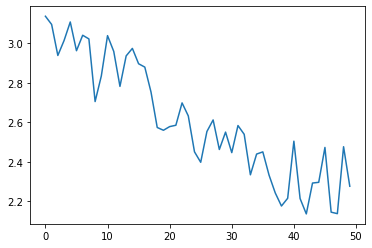

In [14]:
plt.plot(history.history['val_loss'])

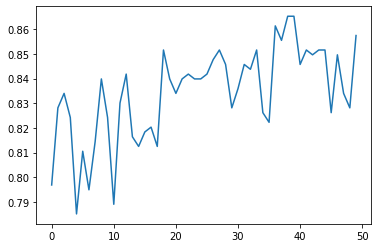

In [15]:
plt.plot(history.history['val_accuracy'])